In [32]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn import svm

import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn

%matplotlib inline

In [2]:
df=pd.read_csv("Downloads/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [29]:
df.shape[0]

284807

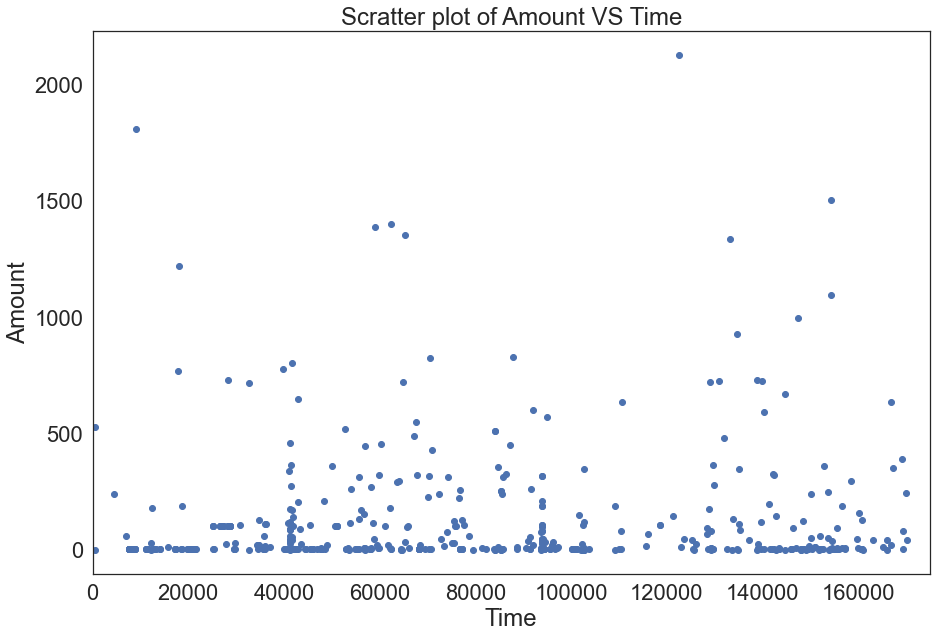

In [30]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot of Amount VS Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.show()

In [6]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0]

In [7]:
nb_big_fraud

9

In [8]:
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [9]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [10]:
df_corr = df.corr() 

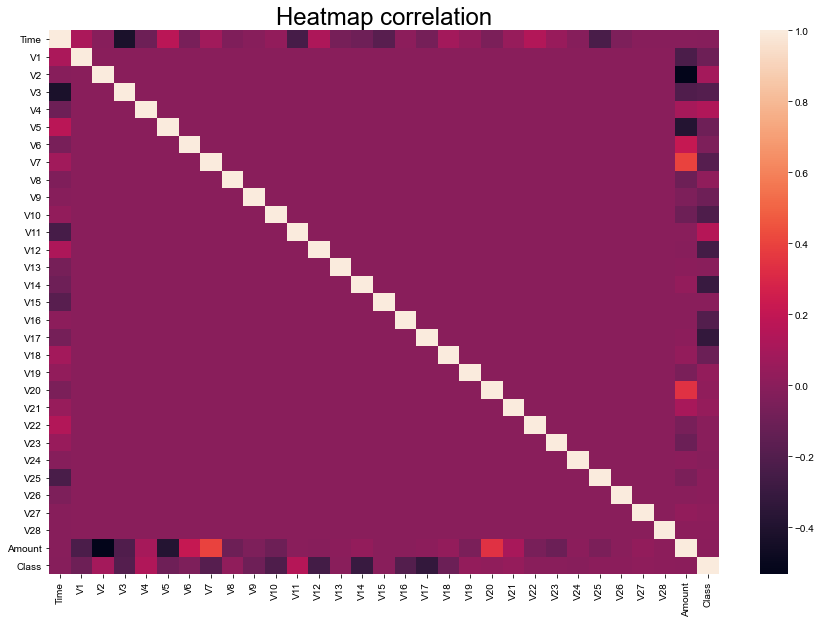

In [11]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr) # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [12]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) 

In [14]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [15]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [16]:
df_train


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101977,68001.0,0.487399,-1.117152,0.297253,1.541083,-0.624310,0.859673,-0.126080,0.421097,0.606959,...,0.177741,0.006305,-0.284703,-0.322124,0.334106,-0.279829,-0.002064,0.052353,302.03,0
10897,18690.0,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1
46998,43028.0,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27,1
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.00,1
77099,56887.0,-0.075483,1.812355,-2.566981,4.127549,-1.628532,-0.805895,-3.390135,1.019353,-2.451251,...,0.794372,0.270471,-0.143624,0.013566,0.634203,0.213693,0.773625,0.387434,5.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91748,63609.0,-1.191636,1.086218,-1.079355,-1.307833,-0.399866,-0.101127,-0.803531,1.212193,-2.061441,...,0.388733,0.503318,-0.247731,-1.384703,0.049239,-0.013302,-0.511854,-0.111912,1.00,0
37538,38998.0,-0.873152,-0.262213,2.350499,-1.450450,-0.520060,-0.768771,0.084807,-0.055525,-0.519163,...,-0.792501,-1.667791,0.026069,0.325951,-0.032779,0.648975,0.041007,-0.099587,20.44,0
16415,27784.0,0.288029,0.965681,-1.459495,1.921863,-1.912414,-1.130282,-2.814263,0.648663,-0.695263,...,0.603127,0.380690,-0.064125,0.271380,0.337220,0.626156,0.565125,0.305925,23.36,1
85566,60830.0,1.297152,0.078975,-0.225255,0.052545,0.571863,0.781242,-0.183612,0.213442,-0.040016,...,-0.296741,-0.867676,-0.054570,-1.726701,0.332014,0.215386,-0.021088,-0.013080,0.99,0


In [17]:
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [18]:
classifier = svm.SVC(kernel='linear')

In [19]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
prediction_SVM_all = classifier.predict(X_test_all)

In [21]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
class_names=np.array(['0','1'])

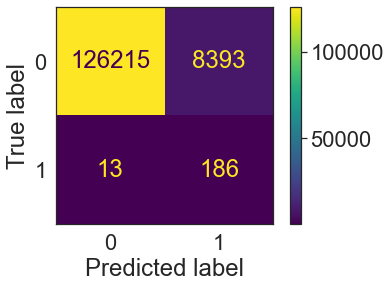

In [23]:
plot_confusion_matrix(classifier,X_test_all,y_test_all)

In [24]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 186 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9346733668341709
the accuracy is : 0.93764418761637


In [38]:
print(classification_report(prediction_SVM_all,y_test_all))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    126228
           1       0.93      0.02      0.04      8579

    accuracy                           0.94    134807
   macro avg       0.94      0.51      0.51    134807
weighted avg       0.94      0.94      0.91    134807

